Load the California Housing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
data = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['Target'] = data.target  # Adding target column

# Display the first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Preprocess the Data

In [5]:
# Check for missing values
print(df.isnull().sum())

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target

X_scaled = scaler.fit_transform(X)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


Split the Data into Training and Testing Sets

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 16512 samples
Test set size: 4128 samples


Apply Ridge Regression

In [11]:
from sklearn.linear_model import Ridge

# Create and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization parameter
ridge_model.fit(X_train, y_train)

# Predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

Evaluate the Model

Training MSE: 0.52
Test MSE: 0.56


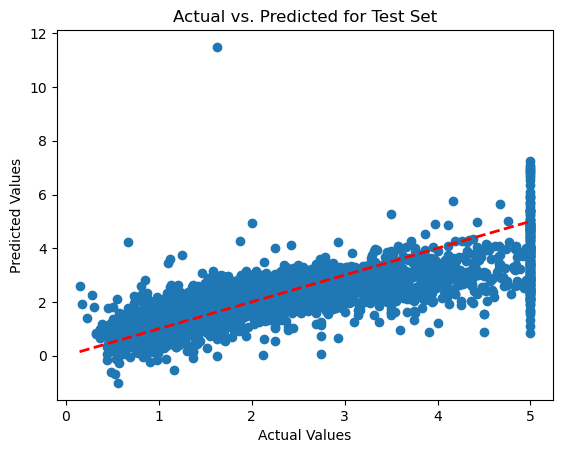

In [14]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate MSE for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

# Plot Actual vs Predicted values for the test set
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted for Test Set")
plt.show()


Tune the Regularization Parameter 𝛼


In [17]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to try
alpha_values = [0.01, 0.1, 1, 10, 100]

# Set up GridSearchCV to find the best alpha
grid_search = GridSearchCV(Ridge(), param_grid={'alpha': alpha_values}, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Retrain the model with the best alpha
best_ridge_model = grid_search.best_estimator_
y_test_pred_best = best_ridge_model.predict(X_test)

# Evaluate with the best alpha
test_mse_best = mean_squared_error(y_test, y_test_pred_best)
print(f"Test MSE with best alpha: {test_mse_best:.2f}")


Best alpha: 1
Test MSE with best alpha: 0.56
